In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# 데이터 불러오기
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기
welfare = raw_welfare.copy()

# pyreadstat

In [3]:
# 분석에 사용할 변수 6개의 이름 알아보기 쉬운 단어로 변경
welfare = welfare.rename(
    columns= {'h14_g3' : 'sex', # 성별
              'h14_g4' : 'birth', # 태어난 연도
              'h14_g10' : 'marriage_type', # 혼인 상태
              'h14_g11' : 'religion', # 종교
              'p1402_8aq1' : 'income', # 월급
              'h14_eco9' : 'code_job', # 직업 코드
              'h14_reg7' : 'code_region' # 지역 코드
              }
)

In [4]:
# [성별에 따른 월급 차이]
# 단계
# 1. 변수 검토 및 전처리
# 성별, 월급

# 2. 변수 간 관계 분석
# 성별 월급 평균표 만들기
# 그래프 만들기

In [5]:
# 1. 변수 검토 및 전처리
# 변수 타입 : df.dtypes
# 범주마다 몇 명 : df.value_counts()
welfare['sex'].dtypes

dtype('float64')

In [6]:
# 빈도
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [7]:
# 전처리
# 1 : 남자, 2 : 여자, 9 : 모르거나 답하지 않음
# 이상치 -> 분석할 때 제거하기 편하도록 NaN

# 이상치 확인
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [8]:
# 만약 이상치가 있다면?
# 이상치 결측 처리
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

# 결측치 확인
welfare['sex'].isna().sum()

# 성별 항목 이름 부여
# 숫자 1, 2 -> 의미를 이해하기 쉽도록 문자열
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

# 빈도 구하기
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

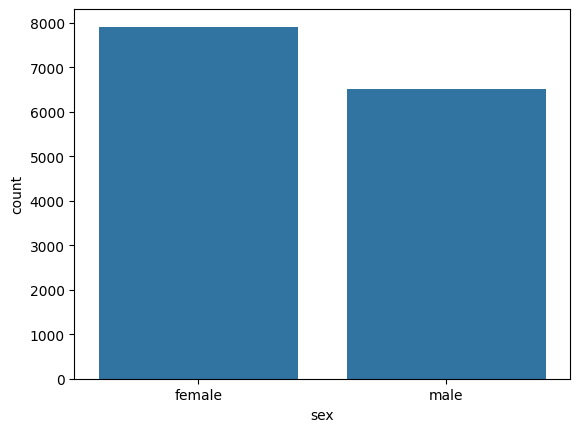

In [9]:
# 빈도 막대 그래프(barplot) 생성 -> countplot()
sns.countplot(data=welfare, x='sex')

In [10]:
# 월급 변수 검토
# income(월급)

# 성별 -> 범주 변수 -> df.value_counts()
# 월급 -> 연속 변수 -> df.describe()

welfare['income'].dtypes

# 요약 통계량
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

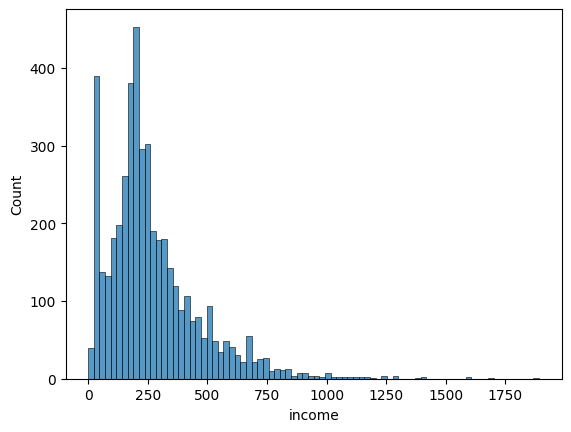

In [11]:
# 히스토그램으로 만들어 분포 확인
sns.histplot(data=welfare, x='income')

In [12]:
# [성별에 따른 월급 차이 분석하기]

# 1. 성별 월급 평균표 만들기
# 순서
# 1) income 결측치 제거
# 2) sex별 분리
# 3) income 평균 구하기

sex_income = welfare.dropna(subset='income')\
.groupby('sex', as_index=False)\
.agg(mean_income = ('income', 'mean'))

<Axes: xlabel='sex', ylabel='mean_income'>

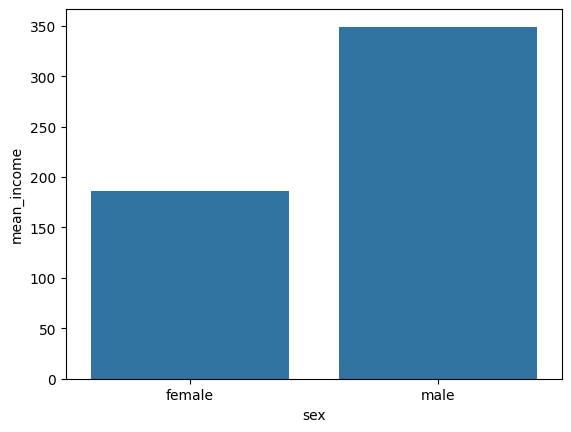

In [13]:
# 2. 그래프 생성
sns.barplot(data=sex_income, x='sex', y='mean_income')

In [14]:
# [나이와 월급의 관계]
# 1단계 
# 나이, 월급

# 2단계
# 나이에 따른 월급 평균 생성 -> 그래프 생성

# 나이, 월급 전처리 작업
# 태어난 연도 변수 -> 나이 변수 생성
welfare['birth'].dtypes

dtype('float64')

In [15]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

<Axes: xlabel='birth', ylabel='Count'>

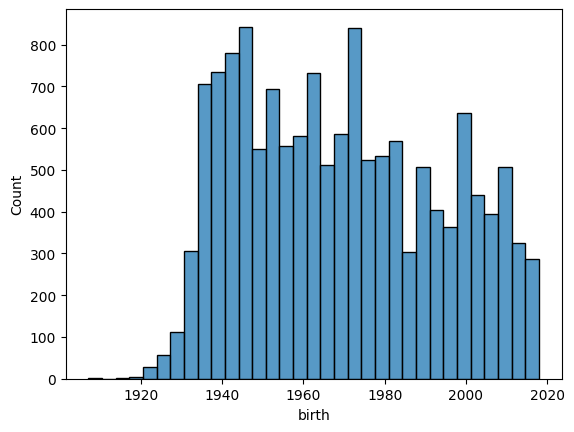

In [16]:
sns.histplot(data=welfare, x='birth')

In [17]:
# 결측치 확인 -> 0
welfare['birth'].isna().sum()

np.int64(0)

In [18]:
# 이상치 발견?
# 이상치 -> 결측 확인
welfare['birth'] = np.where(welfare['birth']==9999, np.nan, welfare['birth'])

In [19]:
# 파생 변수(나이) 생성
# 2019년 기준으로 나이 생성
# 파생 변수 : assign()
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare['birth'].describe

<bound method NDFrame.describe of 0        1945.0
1        1948.0
2        1942.0
3        1962.0
4        1963.0
          ...  
14413    1967.0
14414    1992.0
14415    1995.0
14416    1998.0
14417    2001.0
Name: birth, Length: 14418, dtype: float64>

In [20]:
# 순서 : 나이와 월급의 관계 분석
# income 결측 처리
# age별 분리
# income 평균 구하기
age_income = welfare.dropna(subset='income')\
.groupby('age')\
.agg(mean_income = ('income', 'mean'))

age_income.head()


,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


<Axes: xlabel='age', ylabel='mean_income'>

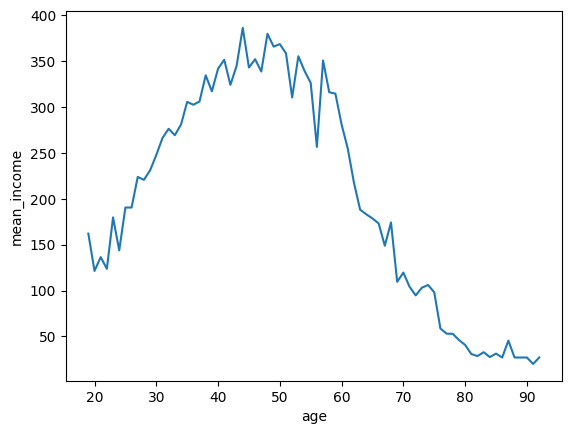

In [21]:
# 선 그래프 : lineplot()
sns.lineplot(data=age_income, x='age', y='mean_income')

In [22]:
# [연령대에 따른 월급 차이]
# 파생변수 : 연령대
# 나이 변수 살펴보기
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

<Axes: xlabel='ageg', ylabel='count'>

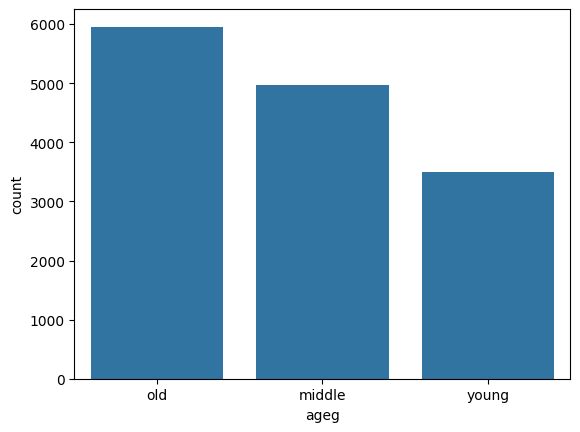

In [23]:
# 연령대 변수 만들기
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                np.where(welfare['age'] <= 59, 'middle',
                                'old')))

# 빈도 구하기
welfare['ageg'].value_counts()

# 빈도 막대 그래프 만들기
sns.countplot(data=welfare, x='ageg')

In [24]:
# 연령대에 따른 월급 분석
# 1) 연령대별 월급 평균표
# 순서 : income 결측치 제거, ageg별 분리, income 평균 구하기
ageg_income = welfare.dropna(subset='income')\
.groupby('ageg', as_index=False)\
.agg(mean_income=('income', 'mean'))

<Axes: xlabel='ageg', ylabel='mean_income'>

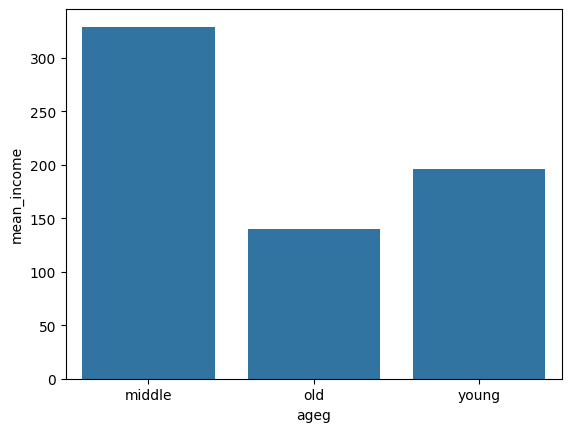

In [25]:
# 그래프
sns.barplot(data=ageg_income, x='ageg', y='mean_income')

<Axes: xlabel='ageg', ylabel='mean_income'>

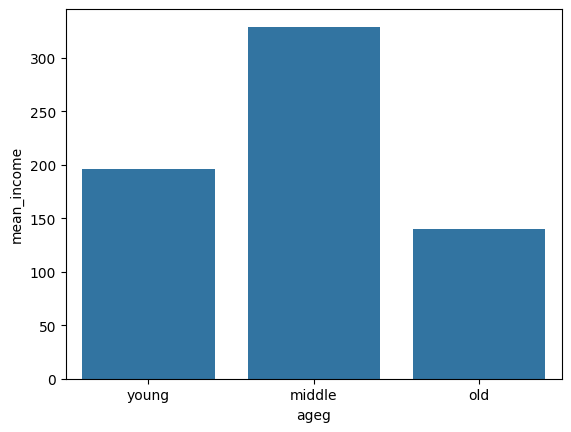

In [26]:
# 초년, 중년, 노년층 순으로 막대 정렬
# order 범주 순서 지정
sns.barplot(data=ageg_income, x='ageg', y='mean_income',
            order=['young', 'middle', 'old'])

In [27]:
# [연령대 및 성별 월급 차이]
# 분석 절차
# 1단계 : 변수 검토 및 전처리
# 연령대, 성별, 월급

# 2단계 : 변수 간 관계 분석
# 연령대 및 성별 월급 평균표 만들기
# 그래프 만들기

In [28]:
# 1. 연령대 및 성별 월급 평균표 만들기
# income 결측치 제거
# ageg 및 sex별 분리
# income 평균 구하기
sex_income = welfare.dropna(subset='income')\
.groupby(['ageg', 'sex'], as_index=False)\
.agg(mean_income = ('income', 'mean'))

# 만약에 더한 값으로 분석하고 싶을 때?
# 모두 다 더해주는 함수 : sum()
# agg(sum_income = ('income', 'sum'))
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


<Axes: xlabel='ageg', ylabel='mean_income'>

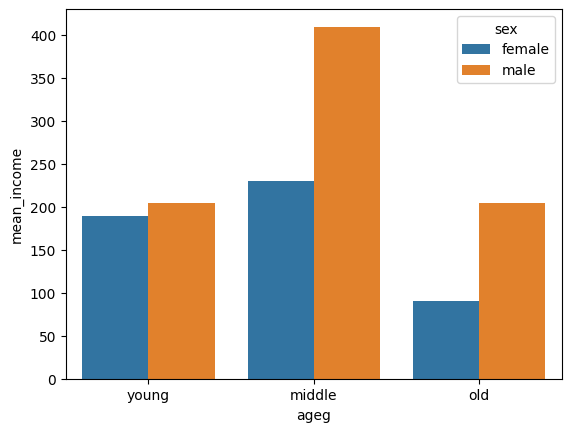

In [29]:
# 그래프
# 연령대별로 나열
# 성별에 따라 다르게 막대 색상 지정 hue = 'sex'
# 축 순서 연령대 순으로 설정
sns.barplot(data=sex_income, x='ageg', y='mean_income',hue='sex',
            order=['young', 'middle', 'old'])

In [30]:
# 나이 및 성별 월급 차이 분석
# 선 그래프 만들기
sex_age = welfare.dropna(subset='income')\
.groupby(['age', 'sex'], as_index=False)\
.agg(mean_income = ('income', 'mean'))

sex_age.head()

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000


<Axes: xlabel='age', ylabel='mean_income'>

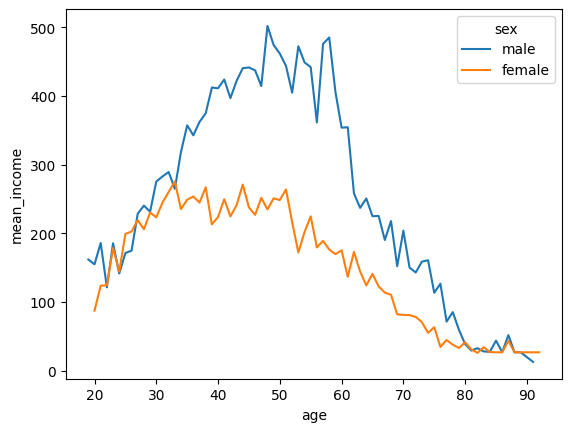

In [31]:
# 선 그래프 만들기
# x : 나이
# y : 평균
# 성별에 따라 선 그래프의 색상이 다르게 출력
sns.lineplot(data=sex_age, x='age', y='mean_income', hue='sex')

In [32]:
# [직업별 월급 차이]
# 직업 변수 검토
welfare['code_job'].dtypes

dtype('float64')

In [33]:
# 빈도 구하기
welfare['code_job'].value_counts()

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [34]:
# 전처리
list_job = pd.read_excel('Koweps_Codebook_2019.xlsx', sheet_name='직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [35]:
# 행, 열 개수 출력
list_job.shape

(156, 2)

In [36]:
# welfare에 list_job 결합하기
welfare = welfare.merge(list_job, how='left', on='code_job')

# code_job 결측치 제거하고 code_job, job 출력
welfare.dropna(subset='code_job')[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [37]:
# 직업별 월급 차이 분석하기
# 1. 직업별 월급 평균표 만들기
job_income = welfare.dropna(subset=['job', 'income'])\
.groupby('job', as_index=False)\
.agg(mean_income=('income', 'mean'))

job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


In [38]:
# 2. 그래프 만들기
# (1) 월급이 많은 직업
# 앞에서 만든 요약표를 월급 기준으로 내림차순 정렬하고 상위 10개만 추출

top10 = job_income.sort_values('mean_income', ascending=False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


In [39]:
# 맑은 고딕 폰트 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'AppleGothic'})

<Axes: xlabel='mean_income', ylabel='job'>

/Users/parkjihyeon/Library/Python/3.12/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) AppleGothic.
  func(*args, **kwargs)
/Users/parkjihyeon/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


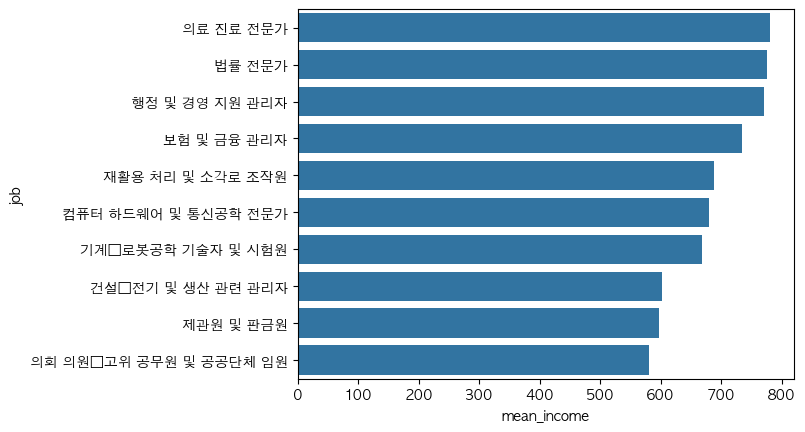

In [40]:
# 직업 이름이 길기 때문에 x축에 직업 이름을 설정하면 서로 겹쳐 알아볼 수 없다.
# 직업 이름은 y축, 월급 평균을 x축에 지정
sns.barplot(data=top10, y='job', x='mean_income')

In [41]:
# (2) 월급이 적은 직업
bottom10 = job_income.sort_values('mean_income').head(10)
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


/var/folders/qs/7vwz223x7fzd_mmkph5ssmjm0000gn/T/ipykernel_68760/463789404.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom10, y='job', x='mean_income', palette='viridis')\


[(0.0, 800.0)]

/Users/parkjihyeon/Library/Python/3.12/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) AppleGothic.
  func(*args, **kwargs)
/Users/parkjihyeon/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


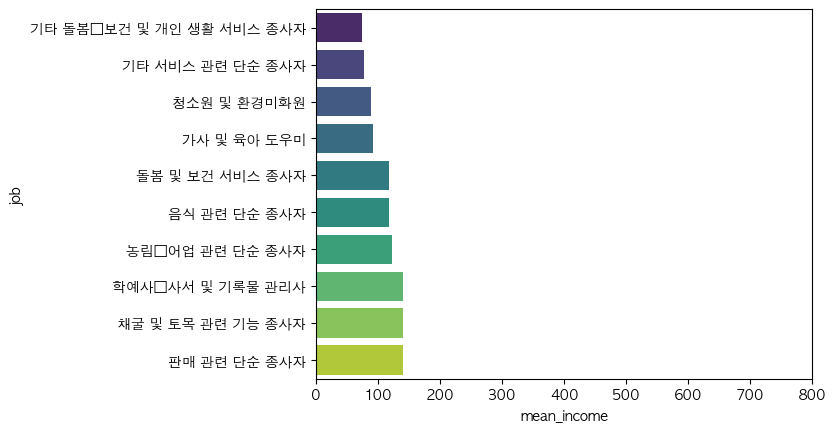

In [42]:
# x축은 0 ~ 800으로 제한하여 작성
sns.barplot(data=bottom10, y='job', x='mean_income', palette='viridis')\
.set(xlim = [0, 800])

/var/folders/qs/7vwz223x7fzd_mmkph5ssmjm0000gn/T/ipykernel_68760/1280487481.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom10, y='job', x='mean_income', palette=colors)\


[(0.0, 800.0)]

/Users/parkjihyeon/Library/Python/3.12/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) AppleGothic.
  func(*args, **kwargs)
/Users/parkjihyeon/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


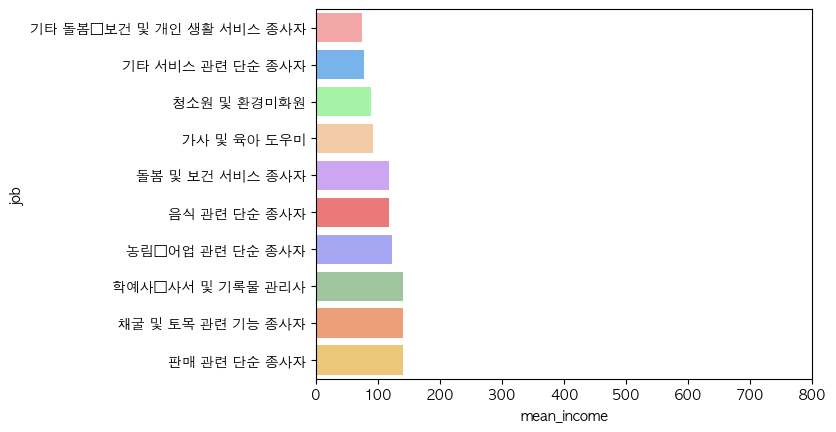

In [43]:
# 커스텀 색상
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#CC99FF', '#FF6666', '#9999FF', '#99CC99', '#FF9966', '#FFCC66']

sns.barplot(data=bottom10, y='job', x='mean_income', palette=colors)\
    .set(xlim=[0, 800])


In [44]:
#[성별 직업 빈도 분석하기]
# 1. 성별 직업 빈도표 만들기
# 성별로 직업별 빈도를 구해 상위 10개 추출

# 남성 직업 빈도 상위 10개 추출
# 순서
'''
1. job 결측치 제거
2. male 추출
3. job별 분리
4. job 빈도 구하기
5. 내림차순 정렬
6. 상위 10행 추출
'''
job_male = welfare.dropna(subset='job')\
.query('sex == "male"')\
.groupby('job', as_index=False)\
.agg(n=('job', 'count'))\
.sort_values('n', ascending=False)\
.head(10)

job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [45]:
# 여성 직업 빈도 상위 10개 추출
job_female = welfare.dropna(subset='job')\
.query('sex == "female"')\
.groupby('job', as_index=False)\
.agg(n=('job', 'count'))\
.sort_values('n', ascending=False)\
.head(10)

job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


[(0.0, 500.0)]

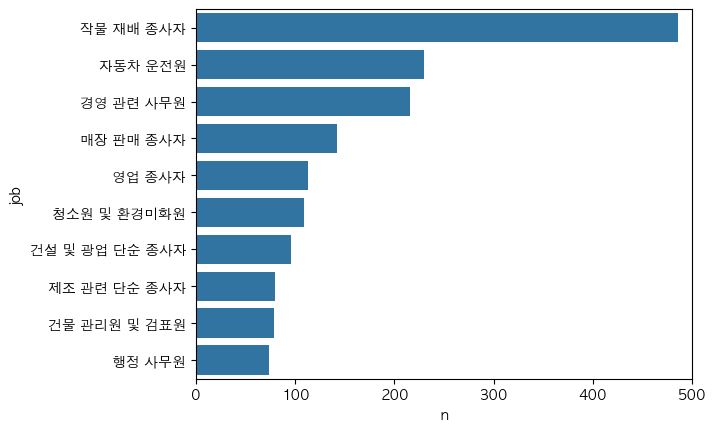

In [46]:
# 2. 그래프 만들기
# 여성, 남성 두 그래프를 비교하기 위해 x축 범위를 0 ~ 500으로 통일
# 남성 직업 빈도 막대 그래프 만들기
sns.barplot(data=job_male, y='job', x='n').set(xlim=[0, 500])

[(0.0, 500.0)]

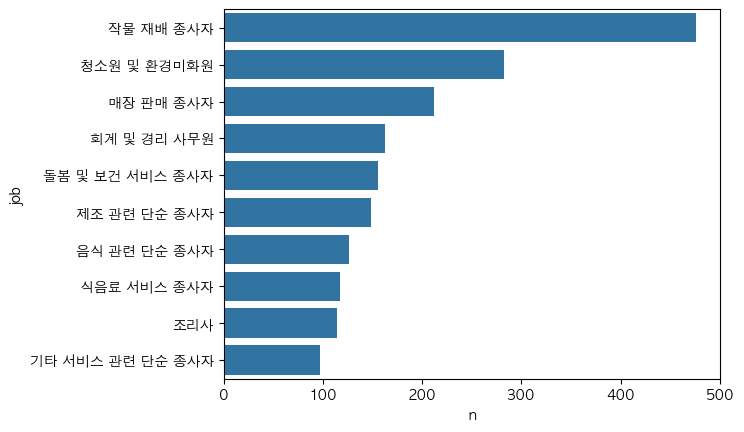

In [47]:
# 여성 직업 빈도 막대 그래프 만들기
sns.barplot(data=job_female, y='job', x='n').set(xlim=[0, 500])

/var/folders/qs/7vwz223x7fzd_mmkph5ssmjm0000gn/T/ipykernel_68760/1216964866.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=job_male, y='job', x='n', palette='viridis').set(xlim=[0, 500])


[(0.0, 500.0)]

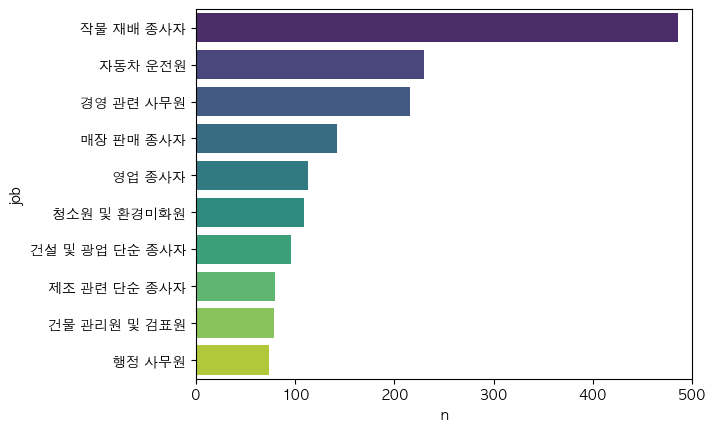

In [48]:
# 그래프 색상 다르게 만들기
# 남성 직업 빈도 막대 그래프 만들기
sns.barplot(data=job_male, y='job', x='n', palette='viridis').set(xlim=[0, 500])

/var/folders/qs/7vwz223x7fzd_mmkph5ssmjm0000gn/T/ipykernel_68760/2846765056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=job_female, y='job', x='n', palette='viridis').set(xlim=[0, 500])


[(0.0, 500.0)]

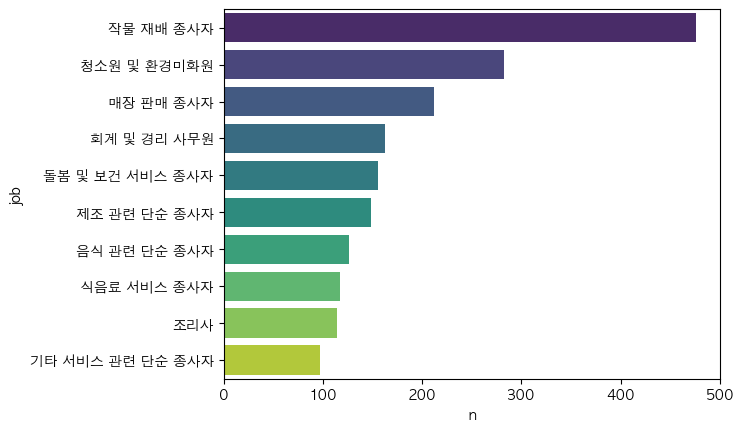

In [49]:
# 여성 직업 빈도 막대 그래프 만들기
sns.barplot(data=job_female, y='job', x='n', palette='viridis').set(xlim=[0, 500])

In [50]:
# [종교 유무에 따른 이혼율]
# 종교 변수 검토
welfare['religion'].dtypes

dtype('float64')

In [51]:
welfare['religion'].value_counts()

religion
2.0    7815
1.0    6603
Name: count, dtype: int64

In [52]:
# 종교 변수 전처리하기
# 종교 유무 이름 부여
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')

# 빈도 구하기
welfare['religion'].value_counts()

religion
no     7815
yes    6603
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

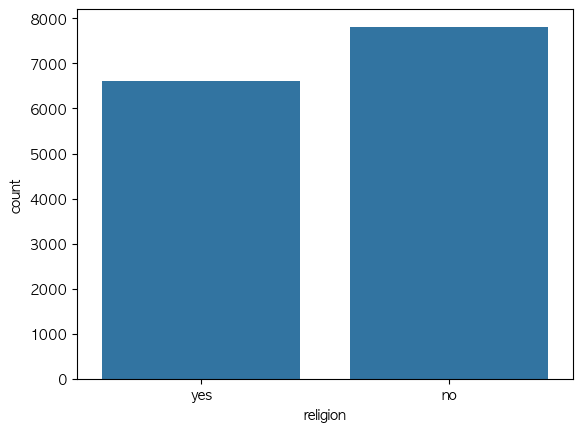

In [53]:
# 막대 그래프 만들기
sns.countplot(data=welfare, x='religion')

In [54]:
# 혼인 상태 변수 검토
welfare['marriage_type'].dtypes


dtype('float64')

In [55]:
welfare['marriage_type'].value_counts()

marriage_type
1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: count, dtype: int64

In [56]:
# 이혼 여부 변수 만들기
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                    np.where(welfare['marriage_type'] == 3, 'divorce',
                               'etc'))

In [57]:
# 이혼 여부별 빈도
n_divorce = welfare.groupby('marriage', as_index = False)\
.agg(n = ('marriage', 'count'))

n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<Axes: xlabel='marriage', ylabel='n'>

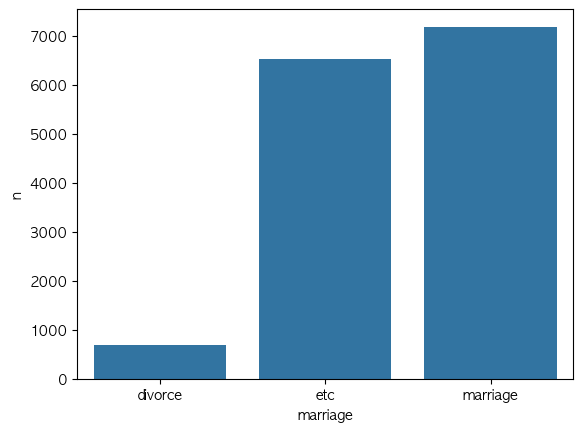

In [58]:
# 막대 그래프 만들기
sns.barplot(data=n_divorce, x='marriage', y='n')

In [59]:
# 종교 유무에 따른 이혼율표 만들기
# 코드 설명
# ['marriage'] : 그룹화된 데이터에서 이 컬럼에만 접근하겠다는 뜻
# value_counts(normalize = True) : 해당 값이 차지하는 비율
# (즉, 각 결혼 상태가 전체의 몇 퍼센트인지를 계산)로 결과 반환
rel_div = welfare.query('marriage != "etc"')\
.groupby('religion', as_index=False)['marriage']\
.value_counts(normalize = True) 

rel_div

,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531


In [60]:
# 그래프 만들기
# 이혼에 해당하는 값만 추출한 다음 proprotion을 백분율로 바꾸고
# 소수점 첫째 자리까지 반올림하자. 
# round() : 값 반올림하는 함수, round() 괄호 안에 출력할 자릿수 입력

# divorce 추출
# 백분율로 바꾸기
# 반올림
rel_div = rel_div.query('marriage == "divorce"')\
.assign(proportion = rel_div['proportion'] * 100)\
.round(1)

rel_div

,religion,marriage,proportion
1,no,divorce,9.5
3,yes,divorce,8.0


/var/folders/qs/7vwz223x7fzd_mmkph5ssmjm0000gn/T/ipykernel_68760/1082777876.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rel_div, x='religion', y='proportion', palette='viridis')


<Axes: xlabel='religion', ylabel='proportion'>

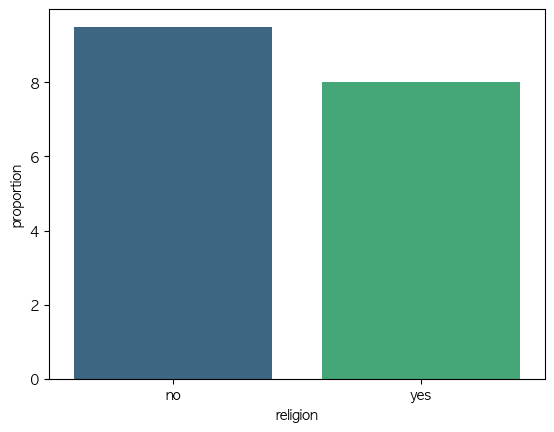

In [61]:
# 막대 그래프 제작
sns.barplot(data=rel_div, x='religion', y='proportion', palette='viridis')

In [62]:
# [지역별 연령대 비율]
# 지역(code_region) 변수 검토 및 전처리

# 1. 변수 검토
welfare['code_region'].dtypes

dtype('float64')

In [63]:
welfare['code_region'].value_counts()

code_region
2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: count, dtype: int64

In [64]:
# 전처리
# 지역 코드 목록 만들기
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region' : ['서울',
                                       '수도권(인천/경기',
                                       '부산/경남/울산',
                                       '대구/경북',
                                       '대전/충남',
                                       '강원/충북',
                                       '광주/전남/전북/제주도']})

list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [65]:
# 지역명 변수 추가
'''
추가 설명
how 파라미터 : 두 df 어떻게 병합할지 결정하는 옵션
[선택할 수 있는 값]
1. left : 왼쪽을 기준으로 병합
2. right : 오른쪽 기준으로 병합
3. inner : 양쪽에 공통으로 존재하는 데이터만 병합
4. outer : 양쪽에 모든 데이터 가져옴

on 파라미터 : 기준이 되는 열(column)을 지정하는 옵션
두 df에서 동일한 이름의 열이 있을 때, 그 열의 값을 기준으로 데이터 결합
위 코드에서는 on ='code_region'을 사용하여 welfare와 list_region에서
code_region이라는 열의 값을 기준으로 병합하고 있음
'''
welfare = welfare.merge(list_region, how='left', on='code_region')
welfare[['code_region', 'region']].head()

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


In [66]:
# 지역별 연령대 비율표 만들기
# 순서
# 1. region별 분리
# 2. ageg 추출
# 3. 비율 구하기
region_ageg = welfare.groupby('region', as_index=False)['ageg']\
.value_counts(normalize=True)

region_ageg

,region,ageg,proportion
0,강원/충북,old,0.459103
1,강원/충북,middle,0.308707
2,강원/충북,young,0.232190
3,광주/전남/전북/제주도,old,0.449311
4,광주/전남/전북/제주도,middle,0.317924
5,광주/전남/전북/제주도,young,0.232766
6,대구/경북,old,0.504051
7,대구/경북,middle,0.296296
8,대구/경북,young,0.199653
9,대전/충남,old,0.413372


In [67]:
# 백분율로 바꾼 뒤 소수점 첫째 자리까지 반올림
region_ageg = \
    region_ageg.assign(proportion = region_ageg['proportion'] * 100)\
    .round(1)

region_ageg

,region,ageg,proportion
0,강원/충북,old,45.9
1,강원/충북,middle,30.9
2,강원/충북,young,23.2
3,광주/전남/전북/제주도,old,44.9
4,광주/전남/전북/제주도,middle,31.8
5,광주/전남/전북/제주도,young,23.3
6,대구/경북,old,50.4
7,대구/경북,middle,29.6
8,대구/경북,young,20.0
9,대전/충남,old,41.3


<Axes: xlabel='proportion', ylabel='region'>

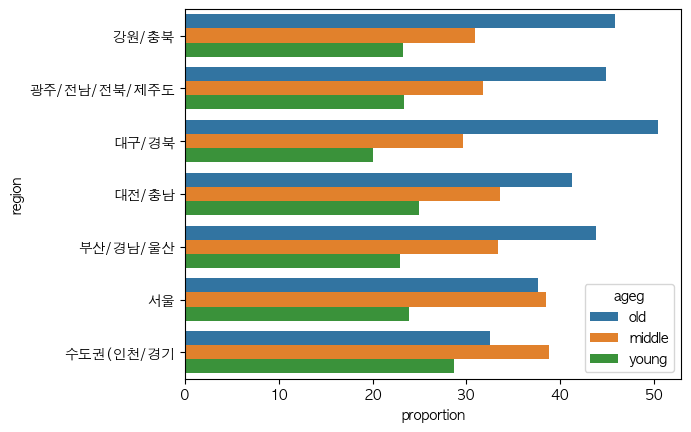

In [68]:
# 그래프 생성
# 조건 : 연령대별로 막대 색상 다르게 지정
sns.barplot(data=region_ageg, y='region', x='proportion', hue='ageg')

In [69]:
# 누적 비율 막대 그래프 생성
pivot_df = \
region_ageg[['region', 'ageg', 'proportion']].pivot(index = 'region',
                                                    columns = 'ageg',
                                                    values = 'proportion')

pivot_df

ageg,middle,old,young
region,,,
강원/충북,30.9,45.9,23.2
광주/전남/전북/제주도,31.8,44.9,23.3
대구/경북,29.6,50.4,20.0
대전/충남,33.6,41.3,25.0
부산/경남/울산,33.4,43.8,22.9
서울,38.5,37.6,23.9
수도권(인천/경기,38.8,32.5,28.7


<Axes: ylabel='region'>

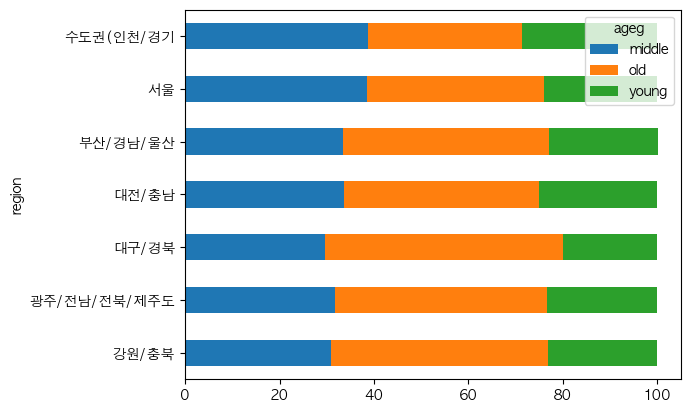

In [70]:
# 그래프 만들기
'''
1. df.plot.barh()
수팽 막대 그래프(horiziontal bar plot)를 생성하는 함수이다.
barh는 bar horizontal의 줄임말로 막대를 가로로 그린다.

2. stacked = True
누적형 그래프를 의미한다.
각 막대가 여러 요소로 구성되어 있을 때
이 요소들이 한 막대 위에 쌓여 나타난다.
'''
pivot_df.plot.barh(stacked = True)

In [71]:
# 노년층 비율 기준으로 정렬, 변수 순서 바꾸기
reorder_df = pivot_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df

ageg,young,middle,old
region,,,
수도권(인천/경기,28.7,38.8,32.5
서울,23.9,38.5,37.6
대전/충남,25.0,33.6,41.3
부산/경남/울산,22.9,33.4,43.8
광주/전남/전북/제주도,23.3,31.8,44.9
강원/충북,23.2,30.9,45.9
대구/경북,20.0,29.6,50.4


<Axes: ylabel='region'>

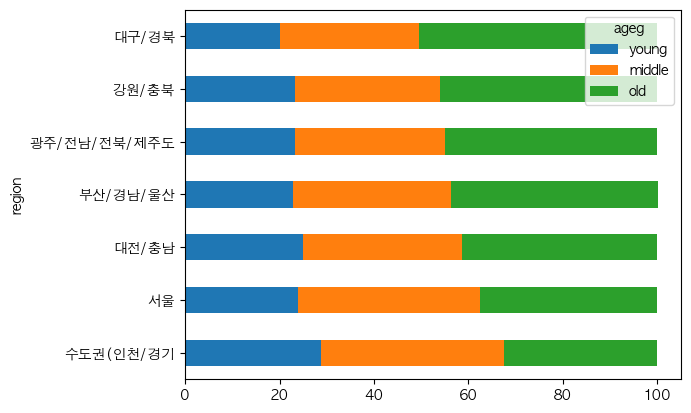

In [72]:
# 누적 가로 막대 그래프 만들기
reorder_df.plot.barh(stacked=True)